<a href="https://colab.research.google.com/github/wayhome/colab/blob/main/forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!apt -qy install fonts-noto-cjk

Reading package lists...
Building dependency tree...
Reading state information...
fonts-noto-cjk is already the newest version (1:20220127+repack1-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [25]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_cjk = fm.FontProperties(fname=r'/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc')
plt.rcParams['font.family'] = font_cjk.get_name()
fm.fontManager.addfont(font_cjk.get_file())
matplotlib.rc('font', family=font_cjk.get_name())

Noto Sans CJK JP


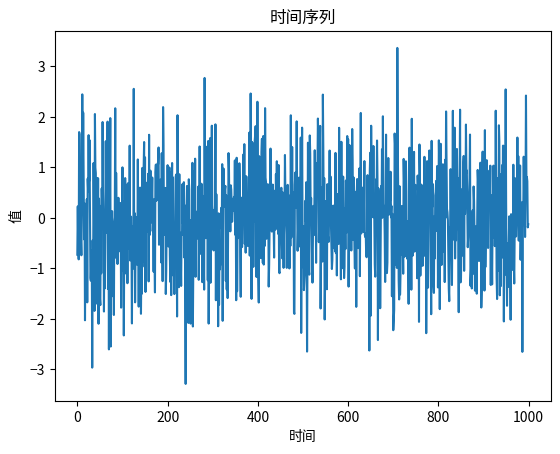

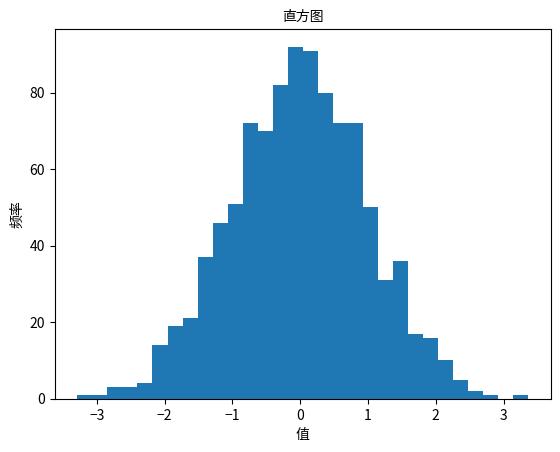

In [28]:
import numpy as np


# 生成1000个来自标准正态分布的样本
samples = np.random.randn(1000)

# 可视化为时间序列
plt.plot(samples)
plt.title('时间序列')
plt.xlabel('时间')
plt.ylabel('值')
plt.show()

# 可视化为直方图
plt.hist(samples, bins=30)
plt.title('直方图', fontproperties=font_cjk)
plt.xlabel('值', fontproperties=font_cjk)
plt.ylabel('频率', fontproperties=font_cjk)
plt.show()
